<a href="https://colab.research.google.com/github/Hussy24/AI-Labs/blob/main/Hasnain_SmS_spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
df1 = pd.read_csv("/content/drive/MyDrive/spam.csv", encoding='latin-1') 

In [13]:
# Dropping the Null columns
df1.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
df1

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [14]:
# Removing the duplicates from the dataset
df1.drop_duplicates(inplace=True)
df1

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [15]:
df1['v1'] = df1.v1.map({'ham':0, 'spam':1})
df1

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [16]:

df1['v1'].unique()

array([0, 1])

In [22]:
# Performing NLTK functions to Optimize the dataset

import nltk
nltk.download('punkt')
nltk.download('stopwords')
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
def transform_sms(message):
    
    # to convert all characters in lower case
    message=message.lower()
    
    # to break sms record into words
    message=nltk.word_tokenize(message)
    
    # to remove special symbals
    temp=[]
    for i in message:
        if i.isalnum():
            temp.append(i)

    # creating clone of temp
    message=temp[:]   
    
    # clear the temp object
    temp.clear()
    
    # removing stopwords and punctuations
    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            temp.append(i)
    
    message=temp[:]
    temp.clear()
    
    # stemming
    for i in message:
        temp.append(ps.stem(i))
    
    
    return " ".join(temp)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
# Applying nltk transformation function

df1['v2']= df1['v2'].apply(transform_sms)

# All stopwords and puctuation signs and extra space is removed

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
# converting into vectors
x = tfidf.fit_transform(df1['v2']).toarray()

In [27]:
y= df1['v1'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [28]:
# Splitting the dataset 
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

print("x_train: ",x_train)
print("x_test: ",x_test)
print("y_train: ",y_train)
print("y_test: ",y_test)

x_train:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
x_test:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
y_train:  [0 0 0 ... 0 0 1]
y_test:  [0 0 0 ... 1 0 0]


In [35]:
#Applying the model
from sklearn.naive_bayes import MultinomialNB

model_mnb=MultinomialNB()

model_mnb.fit(x_train,y_train)
# Predicting values
y_pred = model_mnb.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [36]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score

# Accessing Accuracy and Precision of model
print("Accuracy score :- ",accuracy_score(y_test,y_pred))
print("Precision score :- ",precision_score(y_test,y_pred))

Accuracy score :-  0.9613152804642167
Precision score :-  0.9906542056074766


In [38]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       0.99      0.73      0.84       145

    accuracy                           0.96      1034
   macro avg       0.97      0.86      0.91      1034
weighted avg       0.96      0.96      0.96      1034



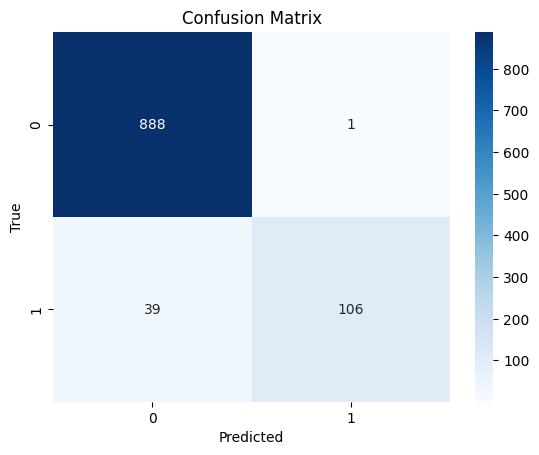

In [40]:
# I used to Chatgpt to help make confusion_matrix

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get the unique class labels
classes = np.unique(np.concatenate((y_test, y_pred)))

# Create a figure and axes
fig, ax = plt.subplots()

# Create the confusion matrix heatmap
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=classes, yticklabels=classes, ax=ax)

# Set the axis labels and title
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')

# Show the plot
plt.show()
